In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Hotel Reservations.csv")

In [3]:
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [5]:
df = df.drop(["Booking_ID"], axis=1)

In [6]:
df.columns, len(df.columns)

(Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
        'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
        'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
        'arrival_date', 'market_segment_type', 'repeated_guest',
        'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
        'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
       dtype='object'),
 18)

In [7]:
cat_cols = df.select_dtypes("object").columns
cat_cols

Index(['type_of_meal_plan', 'room_type_reserved', 'market_segment_type',
       'booking_status'],
      dtype='object')

In [8]:
num_cols = df.select_dtypes(["int", "float"]).columns
num_cols

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

In [9]:
len(num_cols) + len(cat_cols)

18

In [10]:
for i in num_cols:
    print(df[i].value_counts())

no_of_adults
2    26108
1     7695
3     2317
0      139
4       16
Name: count, dtype: int64
no_of_children
0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: count, dtype: int64
no_of_weekend_nights
0    16872
1     9995
2     9071
3      153
4      129
5       34
6       20
7        1
Name: count, dtype: int64
no_of_week_nights
2     11444
1      9488
3      7839
4      2990
0      2387
5      1614
6       189
7       113
10       62
8        62
9        34
11       17
15       10
12        9
14        7
13        5
17        3
16        2
Name: count, dtype: int64
required_car_parking_space
0    35151
1     1124
Name: count, dtype: int64
lead_time
0      1297
1      1078
2       643
3       630
4       628
       ... 
300       1
353       1
328       1
352       1
351       1
Name: count, Length: 352, dtype: int64
arrival_year
2018    29761
2017     6514
Name: count, dtype: int64
arrival_month
10    5317
9     4611
8     3813
6     3203
12    3021
11    

In [11]:
for i in cat_cols:
    print(df[i].value_counts())

type_of_meal_plan
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: count, dtype: int64
room_type_reserved
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64
market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64
booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64


> booking without any adults

In [12]:
df.no_of_children[df.no_of_adults == 0].value_counts()

no_of_children
2    133
3      5
1      1
Name: count, dtype: int64

In [13]:
df.booking_status[df.no_of_adults == 0].value_counts()

booking_status
Not_Canceled    95
Canceled        44
Name: count, dtype: int64

In [14]:
df.market_segment_type[df.no_of_adults == 0].value_counts()

market_segment_type
Online           134
Complementary      4
Offline            1
Name: count, dtype: int64

> number of days 0 instances

In [15]:
df.no_of_weekend_nights[df.no_of_week_nights == 0].value_counts()

no_of_weekend_nights
1    1522
2     787
0      78
Name: count, dtype: int64

In [16]:
df[(df.no_of_week_nights == 0) & (df.no_of_weekend_nights == 0)].booking_status.value_counts()

booking_status
Not_Canceled    76
Canceled         2
Name: count, dtype: int64

In [17]:
df[(df.no_of_week_nights == 0) & (df.no_of_weekend_nights == 0)].avg_price_per_room.sum()

0.0

In [18]:
df[(df.no_of_week_nights == 0) & (df.no_of_weekend_nights == 0)].type_of_meal_plan.value_counts()

type_of_meal_plan
Meal Plan 1     57
Not Selected    16
Meal Plan 2      5
Name: count, dtype: int64

In [19]:
df[(df.no_of_week_nights == 0) & (df.no_of_weekend_nights == 0)].market_segment_type.value_counts()

market_segment_type
Online           65
Complementary    13
Name: count, dtype: int64

> previous cancellations

In [20]:
df.booking_status[df.no_of_previous_cancellations != 0].value_counts()

booking_status
Not_Canceled    322
Canceled         16
Name: count, dtype: int64

## EDA

<Axes: xlabel='arrival_month'>

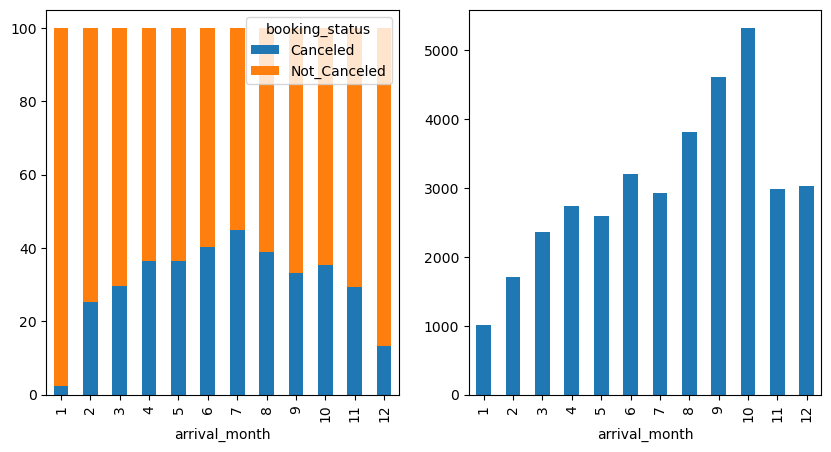

In [21]:
temp = pd.crosstab(df.arrival_month, df.booking_status)
perc = temp.div(temp.sum(axis=1), axis=0) * 100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
perc.plot(kind="bar", stacked=True, ax=ax1)
df.arrival_month.value_counts().sort_index().plot(kind="bar", ax=ax2)

<Axes: xlabel='type_of_meal_plan'>

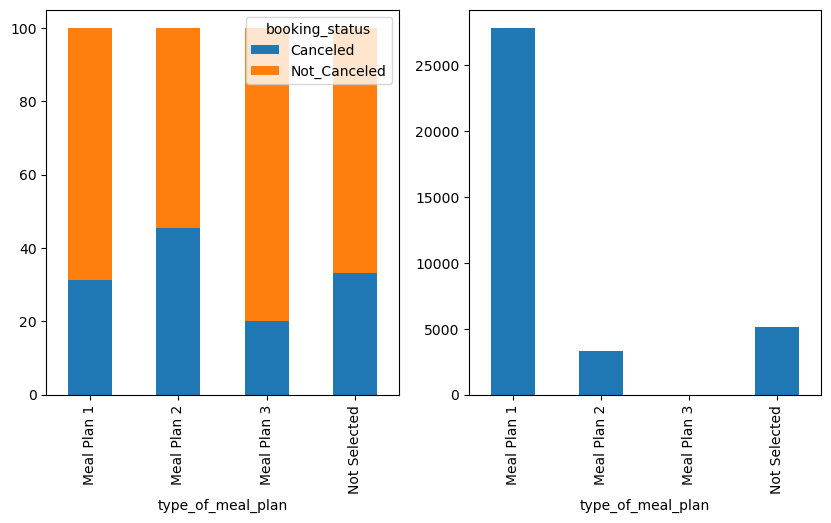

In [22]:
temp = pd.crosstab(df.type_of_meal_plan, df.booking_status)
perc = temp.div(temp.sum(axis=1), axis=0)*100
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
perc.plot(kind="bar", stacked=True, ax=ax1)
df.type_of_meal_plan.value_counts().sort_index().plot(kind="bar", ax=ax2)

<Axes: xlabel='no_of_special_requests'>

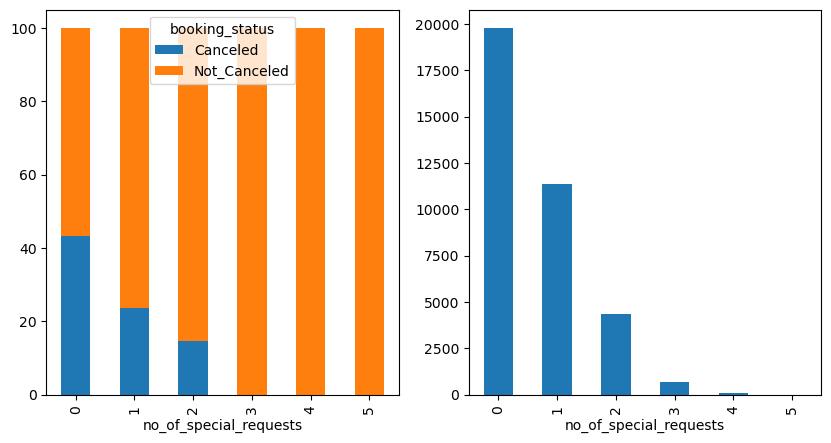

In [23]:
temp = pd.crosstab(df.no_of_special_requests, df.booking_status)
perc = temp.div(temp.sum(axis=1), axis=0)*100
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
perc.plot(kind="bar", stacked=True, ax=ax1)
df.no_of_special_requests.value_counts().sort_index().plot(kind="bar", ax=ax2)

<Axes: xlabel='room_type_reserved'>

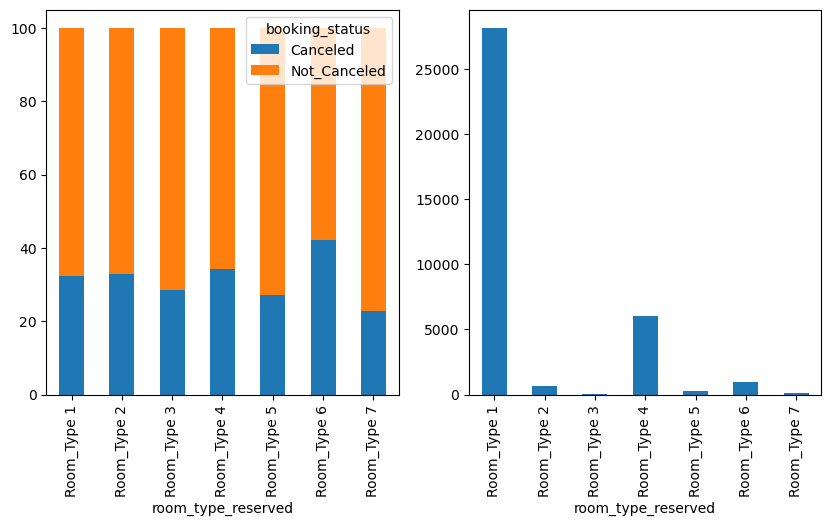

In [24]:
temp = pd.crosstab(df.room_type_reserved, df.booking_status)
perc = temp.div(temp.sum(axis=1), axis=0)*100
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
perc.plot(kind="bar", stacked=True, ax=ax1)
df.room_type_reserved.value_counts().sort_index().plot(kind="bar", ax=ax2)

In [25]:
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [26]:
temp = df[["arrival_year","arrival_month", "arrival_date"]]
temp.rename(columns={
    "arrival_date": "day",
    "arrival_month": "month",
    "arrival_year": "year"
}, inplace=True)
temp["timestamp"] = None

for i in range(temp.shape[0]):
    j = temp.iloc[[i], :3]
    try:
        k = pd.to_datetime(j)
        temp.iloc[i, 3] = k.tolist()[0]
    except:
        print(j)

    

C:\Users\malis\AppData\Local\Temp\ipykernel_10528\467378292.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.rename(columns={
C:\Users\malis\AppData\Local\Temp\ipykernel_10528\467378292.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["timestamp"] = None


      year  month  day
2626  2018      2   29
      year  month  day
3677  2018      2   29
      year  month  day
5600  2018      2   29
      year  month  day
6343  2018      2   29
      year  month  day
7648  2018      2   29
      year  month  day
8000  2018      2   29
      year  month  day
8989  2018      2   29
      year  month  day
9153  2018      2   29
      year  month  day
9245  2018      2   29
      year  month  day
9664  2018      2   29
      year  month  day
9934  2018      2   29
       year  month  day
10593  2018      2   29
       year  month  day
10652  2018      2   29
       year  month  day
10747  2018      2   29
       year  month  day
11881  2018      2   29
       year  month  day
13958  2018      2   29
       year  month  day
14304  2018      2   29
       year  month  day
15363  2018      2   29
       year  month  day
15438  2018      2   29
       year  month  day
17202  2018      2   29
       year  month  day
18380  2018      2   29
       year  m

In [27]:
df["timestamp"] = temp.timestamp

[]

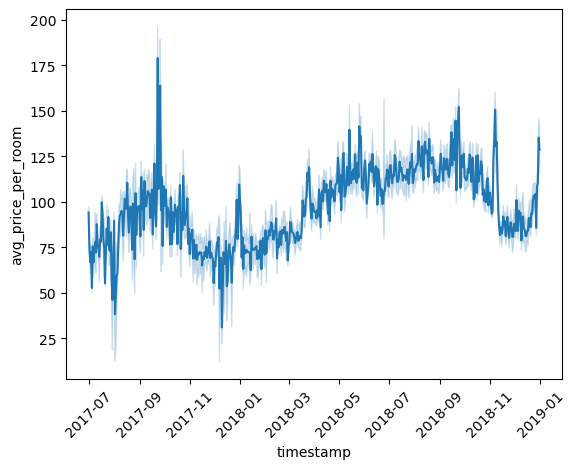

In [28]:
sns.lineplot(x="timestamp", y="avg_price_per_room", data=df)
plt.xticks(rotation=45)
plt.plot()

[]

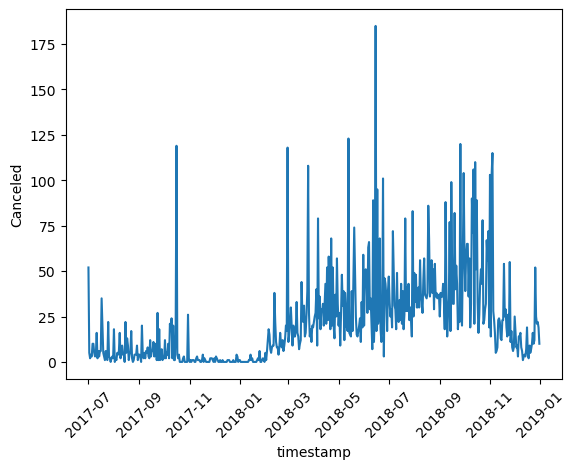

In [29]:
temp = df.groupby(["timestamp","booking_status"]).size().unstack(fill_value=0)
sns.lineplot(x = temp.index, y = temp.Canceled)
plt.xticks(rotation=45)
plt.plot()

<Axes: xlabel='lead_time', ylabel='Count'>

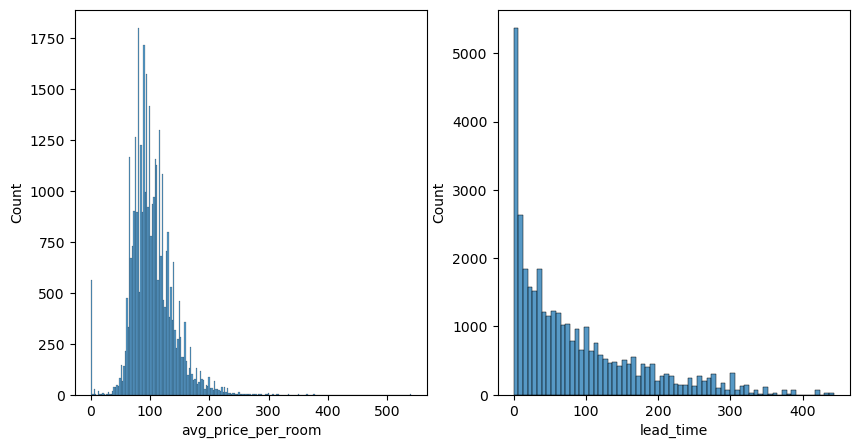

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(df.avg_price_per_room, ax=axes[0])
sns.histplot(df.lead_time)

<Axes: xlabel='avg_price_per_room', ylabel='lead_time'>

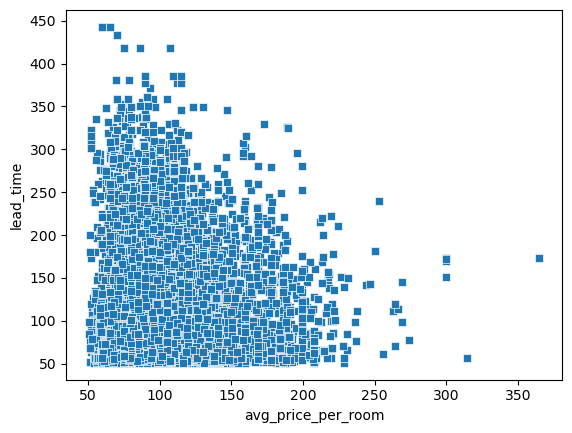

In [31]:
temp = df.loc[(df.avg_price_per_room > 50) & (df.lead_time > 50), ["lead_time", "avg_price_per_room"]]
sns.scatterplot(data=temp, x="avg_price_per_room", y="lead_time", marker=",")

In [32]:
import prince

In [33]:
famd = prince.FAMD(
    n_components=10,
    n_iter=3,
    copy=True,
    check_input=True,
    random_state=42,
    engine="sklearn",
    handle_unknown="error"  # same parameter as sklearn.preprocessing.OneHotEncoder
)

In [34]:
famd = famd.fit(df.iloc[:, :-2])

C:\Users\malis\miniconda3\envs\tf\lib\site-packages\prince\pca.py:174: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-0.49986903867270066, -0.5417891589572564, -0.4920876357042072, -0.5409744379565438, -0.5044802717549399, -0.5298531063096861, -0.49476933204938583, -0.5140077793606634, -0.4992068139986275, -0.49006673338457435, -0.5152933364648721, -0.547256801594826, -0.5233618727960827, -0.5366768615806259, -0.5446310848710865, -0.5271407079538454, -0.5315153946485929, -0.5053538313213337, -0.47498413046144355, -0.46726029651598555, -0.49320678119270905, -0.5027285988557961, -0.4832693621171637, -0.49898587713717607, -0.5122886849822613, -0.5178548767065333, -0.357030404665026, -0.47289014173218336, -0.6130220246913805, -0.7211293692500937, -0.7767823150598, -0.756938955047113, -0.8404652316730745, -0.8024772121907626, -0.9170112962424458, -1.0084139480184888, -1.0828657387378744, -0.8106799181573777, -0.8162376918986807, -1.1985748486495535, -2.5619169

In [35]:
famd.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,24.770,0.60%,0.60%
1,18.913,0.46%,1.07%
2,14.732,0.36%,1.43%
3,14.097,0.34%,1.77%
4,13.420,0.33%,2.10%
5,13.239,0.32%,2.42%
6,12.772,0.31%,2.73%
7,11.772,0.29%,3.02%
8,11.118,0.27%,3.29%


In [75]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

In [50]:
cluster_numbers = list(range(2, 7))
cluster_numbers

[2, 3, 4, 5, 6]

In [52]:
models = [KMeans(n_clusters=i) for i in cluster_numbers]
models

[KMeans(n_clusters=2),
 KMeans(n_clusters=3),
 KMeans(n_clusters=4),
 KMeans(n_clusters=5),
 KMeans(n_clusters=6)]

In [55]:
fitted_models = [i.fit(df[num_cols]) for i in models]
fitted_models

[KMeans(n_clusters=2),
 KMeans(n_clusters=3),
 KMeans(n_clusters=4),
 KMeans(n_clusters=5),
 KMeans(n_clusters=6)]

In [67]:
scores = [silhouette_score(df[num_cols], i.labels_) for i in fitted_models]
scores

[0.5663442269847466,
 0.4507178061530746,
 0.38070704571723024,
 0.3834968600912033,
 0.36676559198138653]

In [69]:
sample_silhouettes = [silhouette_samples(df[num_cols], i.labels_) for i in fitted_models]
sample_silhouettes

[array([0.60186414, 0.72051728, 0.65808332, ..., 0.29717019, 0.65649523,
        0.49621281]),
 array([0.35432873, 0.63218214, 0.53896104, ..., 0.6171027 , 0.28491621,
        0.02885613]),
 array([ 0.32157025,  0.22004836,  0.49981045, ...,  0.62827528,
         0.31365271, -0.00880324]),
 array([0.1233747 , 0.29832926, 0.56304596, ..., 0.30892902, 0.21211512,
        0.32782679]),
 array([0.17000457, 0.24508742, 0.55101242, ..., 0.2526384 , 0.17911891,
        0.34418133])]

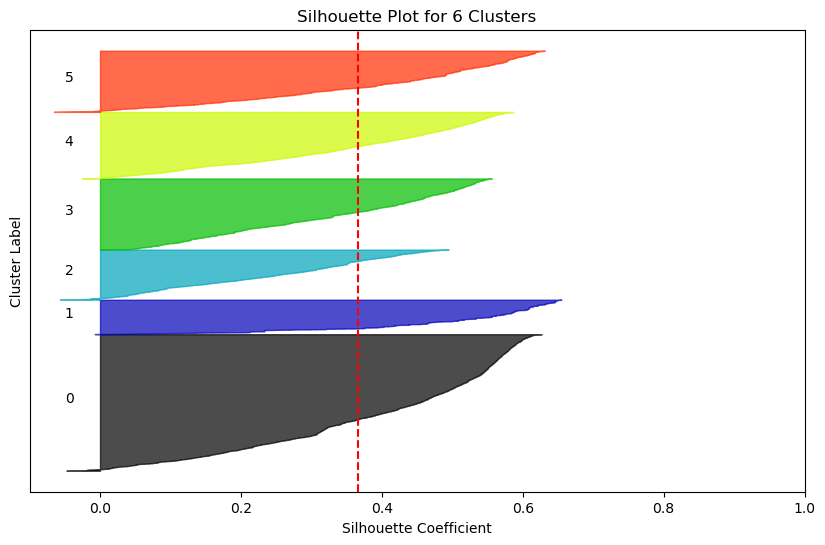

In [82]:
idx = 4
cluster_labels = fitted_models[idx].labels_
sample_silhouette_values = sample_silhouettes[idx]
silhouette_avg = scores[idx]
n_clusters = cluster_numbers[idx]
fig, ax = plt.subplots(figsize=(10, 6))
y_lower = 10  # Starting position for the silhouette plot

for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to cluster i
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    # Compute the y_upper for the current cluster
    y_upper = y_lower + ith_cluster_silhouette_values.shape[0]

    # Choose a color from the colormap for the cluster
    color = cm.nipy_spectral(float(i) / n_clusters)
    ax.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

    # Label the silhouette plots with their cluster numbers at the middle
    ax.text(-0.05, y_lower + 0.5 * ith_cluster_silhouette_values.shape[0], str(i))

    # Update y_lower for the next plot
    y_lower = y_upper + 10  # 10 for spacing between clusters

# Add title and labels
ax.set_title(f"Silhouette Plot for {n_clusters} Clusters")
ax.set_xlabel("Silhouette Coefficient")
ax.set_ylabel("Cluster Label")

# Draw a vertical line for the average silhouette score
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_yticks([])  # Clear the y-axis labels
ax.set_xlim([-0.1, 1])  # Silhouette scores range from -1 to 1
plt.show()

In [65]:
wss = [i.inertia_ for i in fitted_models]
wss

[123950989.15717584,
 82984901.06313004,
 62667473.36945581,
 48454512.81382529,
 43722631.760024846]

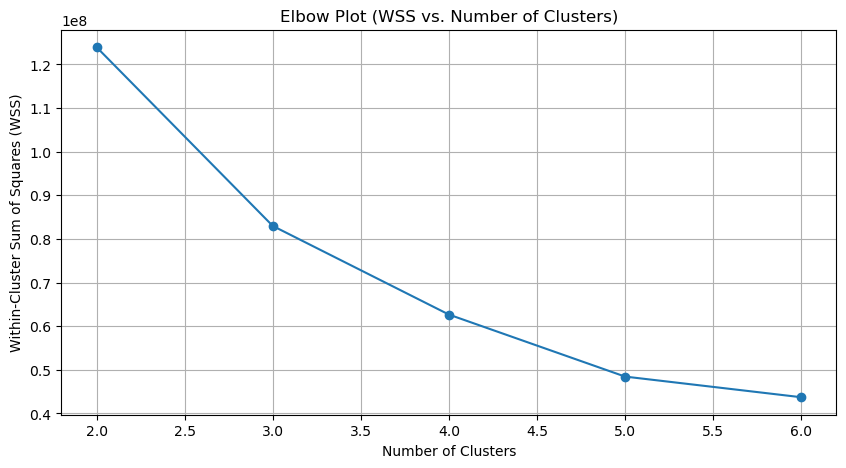

In [66]:
plt.figure(figsize=(10, 5))
plt.plot(cluster_numbers, wss, marker='o')
plt.title("Elbow Plot (WSS vs. Number of Clusters)")
plt.xlabel("Number of Clusters")
plt.ylabel("Within-Cluster Sum of Squares (WSS)")
plt.grid(True)
plt.show()